### Car Sale Advertisements
**car**: manufacturer brand  
**price**: seller’s price in advertisement (in USD/доллар США)  
**body**: car body type  
**mileage**: as mentioned in advertisement (‘000 Km)  
**engV**: rounded engine volume (‘000 cubic cm) - объём двигателя  
**engType**: type of fuel (“Other” in this case should be treated as NA) - тип бензина    
**registration**: whether car registered in Ukraine or not - зарегистрирован ли автомобиль в Украине или нет    
**year**: year of production - год изготовления    
**model**: specific model name - модель  
**drive**: drive type - тип привода (rear - задний, front - передний, full - полноприводный)

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [78]:
df = pd.read_csv('car_ad1.csv' , encoding='latin-1')
df.drop(columns=['registration'], inplace=True)
df.head()

,car,price,body,mileage,engV,engType,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,2013,E-Class,NaN


In [79]:
df.isna().sum()

car          0
price        0
body         0
mileage      0
engV       434
engType      0
year         0
model        0
drive      511
dtype: int64

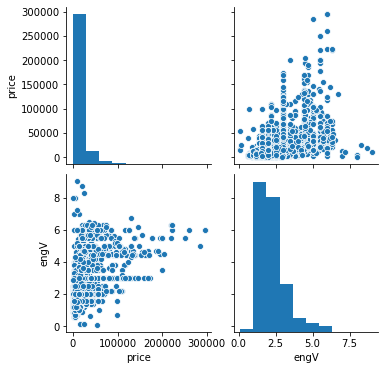

In [80]:
df = df[df['engV'] < 10]
df = df[df['price'] < 300000]
df = df[df['price'] > 0]
sns.pairplot(df[['price', 'engV']])
engV_mean = round(df['engV'].mean(), 2)

In [81]:
df['engV'].fillna(engV_mean, inplace=True)
df['drive'].fillna('N', inplace=True)

In [82]:
df.isna().sum()

car        0
price      0
body       0
mileage    0
engV       0
engType    0
year       0
model      0
drive      0
dtype: int64

### Кодируем категориальные признаки

In [83]:
for col in ('body', 'engType', 'drive'):
    le = LabelEncoder()
    col_le = le.fit_transform(df[col])
    print(np.unique(df[col]), np.unique(col_le))
    df[col] = col_le

df.head()

['crossover' 'hatch' 'other' 'sedan' 'vagon' 'van'] [0 1 2 3 4 5]
['Diesel' 'Gas' 'Other' 'Petrol'] [0 1 2 3]
['N' 'front' 'full' 'rear'] [0 1 2 3]


,car,price,body,mileage,engV,engType,year,model,drive
0,Ford,15500.0,0,68,2.5,1,2010,Kuga,2
1,Mercedes-Benz,20500.0,3,173,1.8,1,2011,E-Class,3
2,Mercedes-Benz,35000.0,2,135,5.5,3,2008,CL 550,3
3,Mercedes-Benz,17800.0,5,162,1.8,0,2012,B 180,1
5,Nissan,16600.0,0,83,2.0,3,2013,X-Trail,2


In [84]:
import scipy.stats as stats

In [85]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [86]:
def log(data, col):
    diagnostic_plots(data, col)
    data[f'{col}_log'] = np.log(data[col])
    diagnostic_plots(data, f'{col}_log')

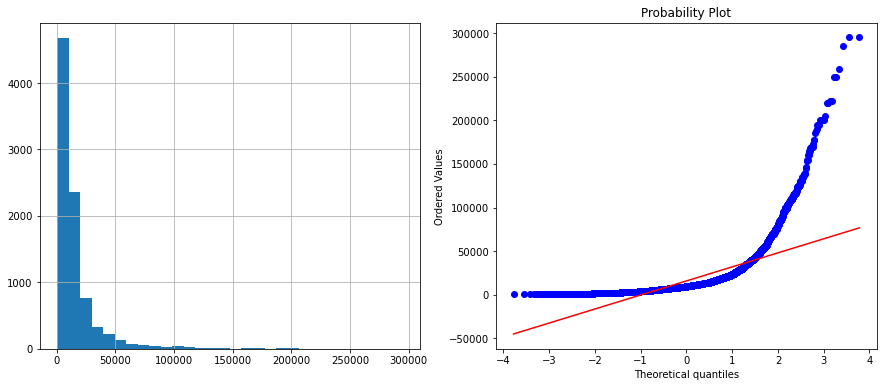

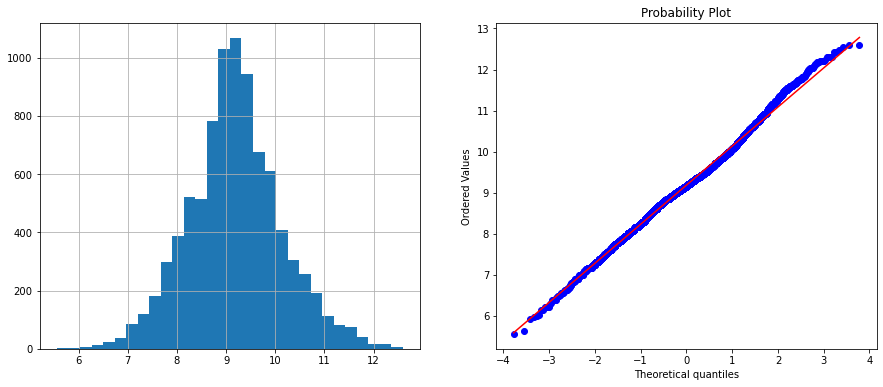

In [87]:
log(df, 'price')

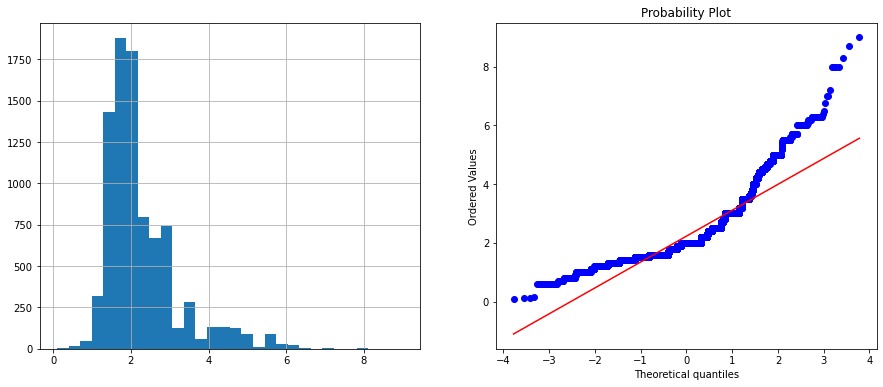

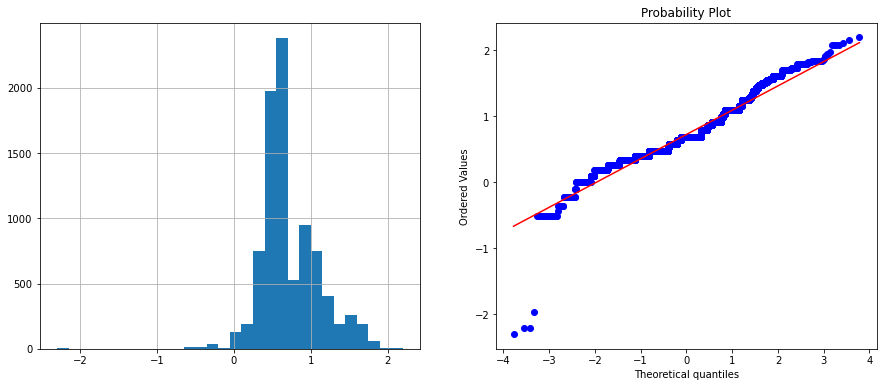

In [88]:
log(df, 'engV')

In [89]:
df.head()

,car,price,body,mileage,engV,engType,year,model,drive,price_log,engV_log
0,Ford,15500.0,0,68,2.5,1,2010,Kuga,2,9.648595,0.916291
1,Mercedes-Benz,20500.0,3,173,1.8,1,2011,E-Class,3,9.928180,0.587787
2,Mercedes-Benz,35000.0,2,135,5.5,3,2008,CL 550,3,10.463103,1.704748
3,Mercedes-Benz,17800.0,5,162,1.8,0,2012,B 180,1,9.786954,0.587787
5,Nissan,16600.0,0,83,2.0,3,2013,X-Trail,2,9.717158,0.693147


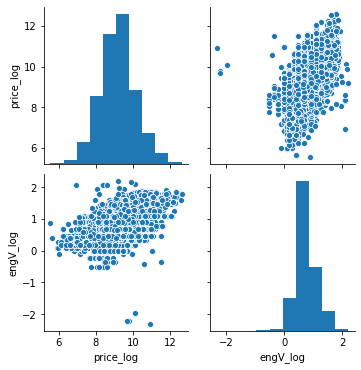

In [91]:
sns.pairplot(df[['price_log', 'engV_log']])

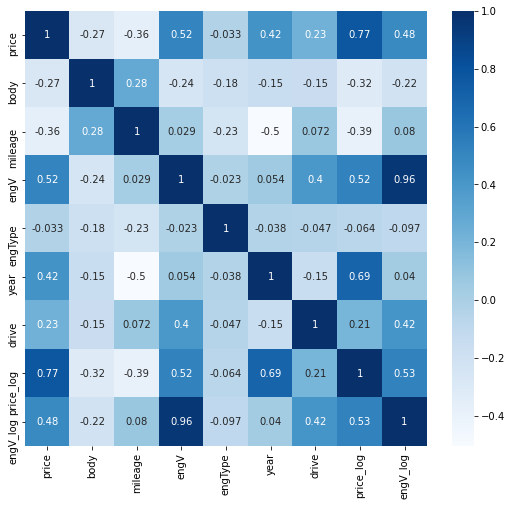

In [97]:
plt.figure(figsize=(9,8))
sns.heatmap(df.corr(), cmap="Blues", annot=True)

In [98]:
df.to_csv('car_ad2.csv', index=False)